## Assignment 1
### Name: Sourodeep Datta
### Roll Number: 21CS10064

In [1]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../../dataset/linear-regression.csv')
print(df.shape) 

(1599, 12)


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Separating y from Dataset

In [4]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [5]:
df = df.drop(['quality'], axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Normalizing Dataset

In [6]:
df_mean = df.mean(axis = 0)
df_mean.head(n = 12)

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64

In [7]:
df_std = df.std()
df_std.head(n = 12)

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
dtype: float64

In [8]:
df_normalized = (df - df_mean) / df_std
df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


Adding a bias feature to dataset, to simplify calculations later

In [9]:
df_normalized.insert(11, 'bias', 1)
df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bias
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,1
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,1
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,1
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,1
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,1


In [10]:
y_normalized = (y - y.mean()) / y.std()
y_normalized.head()

0   -0.787576
1   -0.787576
2   -0.787576
3    0.450707
4   -0.787576
Name: quality, dtype: float64

In [11]:
train_df = df_normalized.sample(frac = 0.5, random_state = 218)
val_df = df_normalized.drop(train_df.index).sample(frac = 0.6, random_state = 218)
test_df = df_normalized.drop(train_df.index).drop(val_df.index)

In [12]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(800, 12)
(479, 12)
(320, 12)


In [13]:
y_train = y_normalized[train_df.index]
y_val = y_normalized[val_df.index]
y_test = y_normalized[test_df.index]

In [14]:
train_df.reset_index(drop = True, inplace=True)
val_df.reset_index(drop = True, inplace=True)
test_df.reset_index(drop = True, inplace=True)
y_train.reset_index(drop = True, inplace=True)
y_val.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

In [15]:
X_train = np.array(train_df)
X_val = np.array(val_df)
X_test = np.array(test_df)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

## Analytical Solution

In [16]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)

### Defining functions for calculating R^2 and RMSE

In [17]:
def R_squared(y, y_hat):
    SS_res = np.square(y - y_hat).sum()
    SS_tot = np.square(y - y.mean()).sum()
    ret = 1 - SS_res / SS_tot
    return ret

In [18]:
def RMSE(y, y_hat):
    return np.sqrt(np.mean((y - y_hat) ** 2))

### Calculating Metrics for Analytical Solution

In [19]:
y_hat = np.matmul(X_test, theta)

In [20]:
print("The R-squared value for the test set is: " + str(R_squared(y_test, y_hat)))
print("The RMSE value for the test set is: " + str(RMSE(y_test, y_hat)))

The R-squared value for the test set is: 0.32014246008040725
The RMSE value for the test set is: 0.8568483269730971


## Iterative Solution

Defining Model

In [21]:
class LinearRegressionModel:
    def __init__(self, X_train, y_train, X_val, y_val, alpha):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.theta = np.random.rand(X_train.shape[1])
        self.alpha = alpha
        self.train_loss = []
        self.val_loss = []
        
    def gradient(self):
        y_hat = np.matmul(self.X_train, self.theta)
        gradient = np.sum((y_hat - self.y_train)[:, np.newaxis] * self.X_train, axis = 0) / self.X_train.shape[0]
        return gradient.T
        
    def step(self):
        self.theta = self.theta - self.alpha * self.gradient()
        
    def loss(self, X, y):
        y_hat = np.matmul(X, self.theta)
        loss = np.sum((y_hat - y) ** 2) / (2 * X.shape[0])
        return loss
        
    def train(self, epochs):
        for i in range(epochs):
            self.step()
            train_loss = self.loss(self.X_train, self.y_train)
            val_loss = self.loss(self.X_val, self.y_val)
            self.train_loss.append(train_loss)
            self.val_loss.append(val_loss)
            if i % 1000 == 0:
                print("Epoch: {}, Train Loss: {}, Val Loss: {}".format(i, train_loss, val_loss))
                
    def predict(self, X):
        y_hat = np.matmul(X, self.theta)
        return y_hat

Function for plotting model

In [22]:
def plot(model):
    plt.plot(np.arange(1, len(model.train_loss) + 1), model.train_loss, label='Trainging Loss')
    plt.plot(np.arange(1, len(model.val_loss) + 1), model.val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()

### Model with Alpha = 0.01

In [23]:
np.random.seed(218)
model = LinearRegressionModel(X_train, y_train, X_val, y_val, 0.01)

In [24]:
model.train(300)

Epoch: 0, Train Loss: 2.614857389730282, Val Loss: 2.9497743937910412


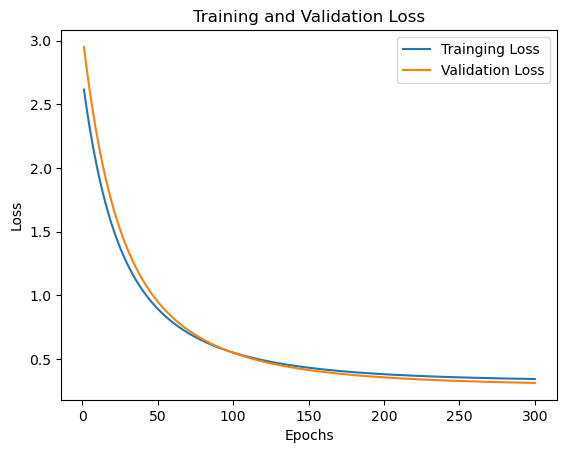

In [25]:
plot(model)

In [26]:
print("The R-squared value for the test set is: " + str(R_squared(y_test, model.predict(X_test))))
print("The RMSE value for the test set is: " + str(RMSE(y_test, model.predict(X_test))))

The R-squared value for the test set is: 0.2947959138295665
The RMSE value for the test set is: 0.8726747372512642


### Model with Alpha = 0.001

In [27]:
np.random.seed(218)
model = LinearRegressionModel(X_train, y_train, X_val, y_val, 0.001)

In [28]:
model.train(3000)

Epoch: 0, Train Loss: 2.6944119572308356, Val Loss: 3.040288619490561
Epoch: 1000, Train Loss: 0.5515119413398927, Val Loss: 0.5501250190430178
Epoch: 2000, Train Loss: 0.38084694281625286, Val Loss: 0.3560731798383467


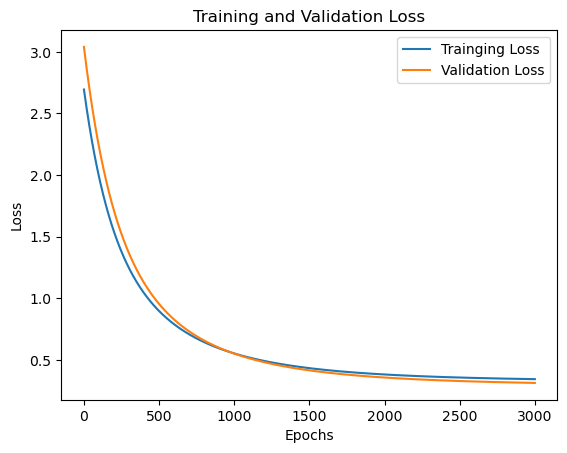

In [29]:
plot(model)

In [30]:
print("The R-squared value for the test set is: " + str(R_squared(y_test, model.predict(X_test))))
print("The RMSE value for the test set is: " + str(RMSE(y_test, model.predict(X_test))))

The R-squared value for the test set is: 0.2944313094180363
The RMSE value for the test set is: 0.8729003031189544


### Model with Alpha = 0.0001

In [31]:
np.random.seed(218)
model = LinearRegressionModel(X_train, y_train, X_val, y_val, 0.0001)

In [32]:
model.train(25000)

Epoch: 0, Train Loss: 2.7024662621660274, Val Loss: 3.0494456301906565
Epoch: 1000, Train Loss: 1.992074220179704, Val Loss: 2.2360660199322036
Epoch: 2000, Train Loss: 1.5426920786398222, Val Loss: 1.7143931850020224
Epoch: 3000, Train Loss: 1.2464319052687862, Val Loss: 1.3669497003957207
Epoch: 4000, Train Loss: 1.042836021638482, Val Loss: 1.1267632666266088
Epoch: 5000, Train Loss: 0.8973489711342372, Val Loss: 0.9548385713525701
Epoch: 6000, Train Loss: 0.7897284540484989, Val Loss: 0.827894663236715
Epoch: 7000, Train Loss: 0.7077630996657638, Val Loss: 0.7316299451861125
Epoch: 8000, Train Loss: 0.6438356097126328, Val Loss: 0.6569809790978351
Epoch: 9000, Train Loss: 0.5930199477663399, Val Loss: 0.5980148344314871
Epoch: 10000, Train Loss: 0.5520116202197042, Val Loss: 0.5507211490213487
Epoch: 11000, Train Loss: 0.5185146908024693, Val Loss: 0.5123055525328194
Epoch: 12000, Train Loss: 0.49088226850444466, Val Loss: 0.48076651291831507
Epoch: 13000, Train Loss: 0.46789985303

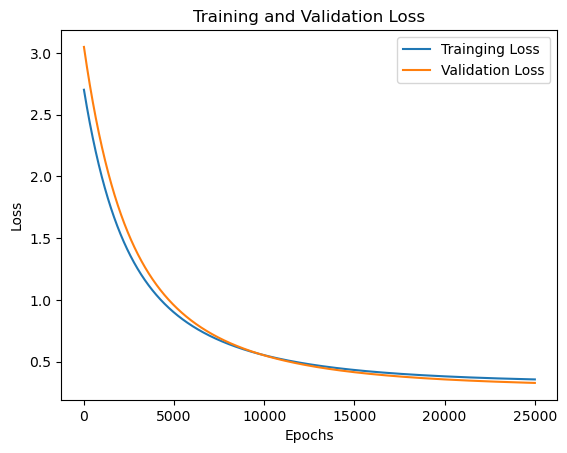

In [33]:
plot(model)

In [34]:
print("The R-squared value for the test set is: " + str(R_squared(y_test, model.predict(X_test))))
print("The RMSE value for the test set is: " + str(RMSE(y_test, model.predict(X_test))))

The R-squared value for the test set is: 0.26755934850049523
The RMSE value for the test set is: 0.8893674159401217
